# 데이터 분석 프로젝트: 제주도 카드 이용 패턴 분석
## 제주데이터허브(https://www.jejudatahub.net/) 에서 제공하는 공공 데이터를 활용해 볼 겁니다. 먼저 내국인의 지역/업종/연령대별 카드 이용 데이터를 분석할 건데요. 카드 매출액의 월별 추이는 어떤지, 업종별 비중은 어떤지, 연령대별로는 어떤 차이가 있는지 등 다양한 정보를 자유롭게 확인해 보시면 됩니다.

# 1. 기본 설정 및 데이터 불러오기

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#한글 폰트 설정
# plt.rc('font', family='NanumGothic')

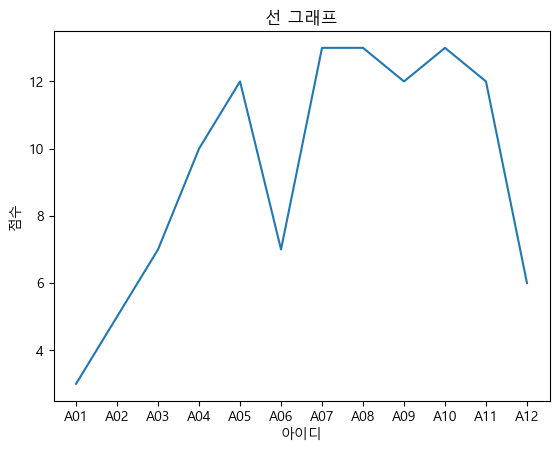

In [2]:
# 한글 설정
# import pandas as pd
#matplotlib 패키지 한글 깨짐 처리 시작
import matplotlib.pyplot as plt
import platform
if platform.system() == 'Darwin': #맥
        plt.rc('font', family='AppleGothic') 
elif platform.system() == 'Windows': #윈도우
        plt.rc('font', family='Malgun Gothic') 
elif platform.system() == 'Linux': #리눅스 (구글 콜랩)
        #!wget "https://www.wfonts.com/download/data/2016/06/13/malgun-gothic/malgun.ttf"
        #!mv malgun.ttf /usr/share/fonts/truetype/
        #import matplotlib.font_manager as fm 
        #fm._rebuild() 
        plt.rc('font', family='Malgun Gothic') 
plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결
#matplotlib 패키지 한글 깨짐 처리 끝

##########데이터 로드

df = pd.DataFrame([
        ['A01', 2, 1, 60, 139, 'country', 0, 3],
        ['A02', 3, 2, 80, 148, 'country', 0, 5],
        ['A03', 3, 4, 50, 149, 'country', 0, 7],
        ['A04', 5, 5, 40, 151, 'country', 0, 10],
        ['A05', 7, 5, 35, 154, 'city', 0, 12],
        ['A06', 2, 5, 45, 149, 'country', 0, 7],
        ['A07',8, 9, 40, 155, 'city', 1, 13],
        ['A08', 9, 10, 70, 155, 'city', 3, 13],
        ['A09', 6, 12, 55, 154, 'city', 0, 12],
        ['A10', 9, 2, 40, 156, 'city', 1, 13],
        ['A11', 6, 10, 60, 153, 'city', 0, 12],
        ['A12', 2, 4, 75, 151, 'country', 0, 6]
    ], columns=['ID', 'hour', 'attendance', 'weight', 'iq', 'region', 'library', 'score'])

##########데이터 분석

plt.plot(df['ID'], df['score']) #x축, y축
plt.title('선 그래프')
plt.xlabel('아이디')
plt.ylabel('점수')
plt.show()


# 2. 데이터 불러오기(https://bakey-api.codeit.kr/api/files/resource?root=static&seqId=6382&directory=data.zip&name=data.zip)
data 폴더 안에 있는 jeju_card.csv 파일을 DataFrame으로 불러옵시다.

In [3]:
#데이터 불러오기
jeju_card_df = pd.read_csv('data/jeju_card.csv')
jeju_card_df

,시도명,시군구명,지역구분,업종명,이용자 구분,연령대,성별,연월,이용자수,이용횟수,이용금액
0,제주도,제주시,읍면,유흥,제주도민,60대이상,여,2018-12,23,29,4240100
1,제주도,제주시,읍면,유흥,제주도민,60대이상,남,2018-12,114,190,27414000
2,제주도,제주시,읍면,유흥,제주도민,50대,여,2018-12,52,71,6848000
3,제주도,제주시,읍면,유흥,제주도민,50대,남,2018-12,259,458,91468500
4,제주도,제주시,읍면,유흥,제주도민,40대,여,2018-12,77,99,10021600
...,...,...,...,...,...,...,...,...,...,...,...
19568,제주도,서귀포시,도심,교통,내국인관광객,40대,남,2016-09,1778,2059,79696179
19569,제주도,서귀포시,도심,교통,내국인관광객,30대,여,2016-09,1441,1543,52066479
19570,제주도,서귀포시,도심,교통,내국인관광객,30대,남,2016-09,2358,2606,87972936
19571,제주도,서귀포시,도심,교통,내국인관광객,20대,여,2016-09,731,765,22788256


# 3. 데이터 탐색 및 전처리
데이터를 간단히 탐색하고 전처리해 봅시다.
데이터 개수, 컬럼별 데이터 타입, 통계 정보, 결측값 존재 여부 등을 확인해 보세요.
각 컬럼이 어떤 값들로 이루어져 있는지 확인해 보세요.
2017년과 2018년의 데이터만 추출해 주세요.

In [4]:
# DataFrame의 크기 -로우는 19,573개, 컬럼은 11개
jeju_card_df.shape

(19573, 11)

In [5]:
# 데이터가 대략 어떻게 생겼는지 살펴보기 위해, head()나 tail() 함수를 사용해서 데이터의 처음 혹은 마지막 다섯 줄을 확인
jeju_card_df.head()

,시도명,시군구명,지역구분,업종명,이용자 구분,연령대,성별,연월,이용자수,이용횟수,이용금액
0,제주도,제주시,읍면,유흥,제주도민,60대이상,여,2018-12,23,29,4240100
1,제주도,제주시,읍면,유흥,제주도민,60대이상,남,2018-12,114,190,27414000
2,제주도,제주시,읍면,유흥,제주도민,50대,여,2018-12,52,71,6848000
3,제주도,제주시,읍면,유흥,제주도민,50대,남,2018-12,259,458,91468500
4,제주도,제주시,읍면,유흥,제주도민,40대,여,2018-12,77,99,10021600


In [6]:
# DataFrame에 info() 함수를 사용하면 각 컬럼의 데이터 타입과 함께 결측값이 아닌(non-null) 데이터의 개수를 볼 수 있다
jeju_card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19573 entries, 0 to 19572
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   시도명     19573 non-null  object
 1   시군구명    19573 non-null  object
 2   지역구분    19573 non-null  object
 3   업종명     19573 non-null  object
 4   이용자 구분  19573 non-null  object
 5   연령대     19573 non-null  object
 6   성별      19573 non-null  object
 7   연월      19573 non-null  object
 8   이용자수    19573 non-null  int64 
 9   이용횟수    19573 non-null  int64 
 10  이용금액    19573 non-null  int64 
dtypes: int64(3), object(8)
memory usage: 1.6+ MB


In [7]:
# 위에 있는 출력 결과를 보면, 데이터에 결측값은 따로 없는 것 같네요. 그리고 데이터의 통계 정보를 요약해서 보려면 describe() 함수를 사용하면 됩니다. 이 함수는 기본적으로 숫자 데이터의 통계 정보를 보여주는데요. 참고로 다른 데이터 타입을 가진 컬럼들도 확인하고 싶다면, include라는 파라미터에 'all'이라는 값을 넘겨주면 됩니다.
jeju_card_df.describe(include='all')

,시도명,시군구명,지역구분,업종명,이용자 구분,연령대,성별,연월,이용자수,이용횟수,이용금액
count,19573,19573,19573,19573,19573,19573,19573,19573,19573.000000,19573.000000,1.957300e+04
unique,1,2,2,8,2,7,2,28,NaN,NaN,NaN
top,제주도,제주시,도심,식음료,내국인관광객,50대,남,2017-10,NaN,NaN,NaN
freq,19573,9852,9858,2688,9807,3376,9795,738,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2987.681347,5980.462525,2.100849e+08
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5331.172895,13623.951410,3.921408e+08
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000e+03
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,254.000000,371.000000,1.765947e+07
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,972.000000,1376.000000,7.142090e+07
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3169.000000,5710.000000,2.169743e+08


In [8]:
jeju_card_df.columns

Index(['시도명', '시군구명', '지역구분', '업종명', '이용자 구분', '연령대', '성별', '연월', '이용자수',
       '이용횟수', '이용금액'],
      dtype='object')

In [9]:
# 컬럼별 고유값 확인
for col in jeju_card_df.columns:
    print(f"{col}:", jeju_card_df[col].unique())

시도명: ['제주도']
시군구명: ['제주시' '서귀포시']
지역구분: ['읍면' '도심']
업종명: ['유흥' '식음료' '숙박' '쇼핑' '소매' '문화/레져' '교통' '기타']
이용자 구분: ['제주도민' '내국인관광객']
연령대: ['60대이상' '50대' '40대' '30대' '20대미만' '20대' '20 미만']
성별: ['여' '남']
연월: ['2018-12' '2018-11' '2018-10' '2018-09' '2018-08' '2018-07' '2018-06'
 '2018-05' '2018-04' '2018-03' '2018-02' '2018-01' '2017-12' '2017-11'
 '2017-10' '2017-09' '2017-08' '2017-07' '2017-06' '2017-05' '2017-04'
 '2017-03' '2017-02' '2017-01' '2016-12' '2016-11' '2016-10' '2016-09']
이용자수: [  23  114   52 ... 2892 3072 1441]
이용횟수: [  29  190   71 ... 2064 2478 4961]
이용금액: [ 4240100 27414000  6848000 ... 87972936 22788256 23430793]


In [10]:
# 결측값 확인
print(jeju_card_df.isnull().sum())

시도명       0
시군구명      0
지역구분      0
업종명       0
이용자 구분    0
연령대       0
성별        0
연월        0
이용자수      0
이용횟수      0
이용금액      0
dtype: int64


In [11]:
# 여기서 시도명, 시군구명, 지역구분 등 object 타입의 컬럼들은 top이라는 항목을 통해 가장 많이 등장하는 최빈값이 무엇인지 알 수 있습니다. 그런데 이런 최빈값 말고도, 또 어떤 값들이 들어있는지 알고 싶을 땐 어떻게 해야 할까요?
# 이제부터 차근차근 코드를 작성해 볼게요. 일단 object 타입 컬럼들의 이름들을 구해서 object_columns라는 변수에 저장해 줍시다.
object_columns = jeju_card_df.columns[jeju_card_df.dtypes == 'object']
object_columns

Index(['시도명', '시군구명', '지역구분', '업종명', '이용자 구분', '연령대', '성별', '연월'], dtype='object')

In [12]:
# 여기서 object_columns는 Index라는 종류의 자료형인데요. 얼핏 보면 리스트와 비슷하게 생겼죠? 이 Index도 리스트처럼 안에 들어있는 각 요소에 차례대로 접근할 수 있다는 특징이 있어요. 따라서, 아래와 같이 for문에 활용할 수도 있죠.
for col in object_columns:
    print(col)
    print(jeju_card_df[col].unique(), '\n')

시도명
['제주도'] 

시군구명
['제주시' '서귀포시'] 

지역구분
['읍면' '도심'] 

업종명
['유흥' '식음료' '숙박' '쇼핑' '소매' '문화/레져' '교통' '기타'] 

이용자 구분
['제주도민' '내국인관광객'] 

연령대
['60대이상' '50대' '40대' '30대' '20대미만' '20대' '20 미만'] 

성별
['여' '남'] 

연월
['2018-12' '2018-11' '2018-10' '2018-09' '2018-08' '2018-07' '2018-06'
 '2018-05' '2018-04' '2018-03' '2018-02' '2018-01' '2017-12' '2017-11'
 '2017-10' '2017-09' '2017-08' '2017-07' '2017-06' '2017-05' '2017-04'
 '2017-03' '2017-02' '2017-01' '2016-12' '2016-11' '2016-10' '2016-09'] 



In [13]:
# 연월 컬럼이 'YYYYMM' 형태라면 연도 추출
# jeju_card_df['연도'] = jeju_card_df['연월'].astype(str).str[:4].astype(int)

In [14]:
# 2017년, 2018년 데이터만 필터링
# jeju_card_df = jeju_card_df[jeju_card_df['연도'].isin([2017, 2018])]

In [15]:
# 2017년, 2018년의 데이터만 추출하기
jeju_card_df.loc[:, '연도'] = jeju_card_df['연월'].str.split('-').str[0]

In [16]:
jeju_card_df = jeju_card_df[jeju_card_df['연도'] != '2016']

In [17]:
jeju_card_df.shape

(16707, 12)

In [18]:
for col in object_columns:
    print(col)
    print(jeju_card_df[col].unique(), '\n')

시도명
['제주도'] 

시군구명
['제주시' '서귀포시'] 

지역구분
['읍면' '도심'] 

업종명
['유흥' '식음료' '숙박' '쇼핑' '소매' '문화/레져' '교통' '기타'] 

이용자 구분
['제주도민' '내국인관광객'] 

연령대
['60대이상' '50대' '40대' '30대' '20대미만' '20대' '20 미만'] 

성별
['여' '남'] 

연월
['2018-12' '2018-11' '2018-10' '2018-09' '2018-08' '2018-07' '2018-06'
 '2018-05' '2018-04' '2018-03' '2018-02' '2018-01' '2017-12' '2017-11'
 '2017-10' '2017-09' '2017-08' '2017-07' '2017-06' '2017-05' '2017-04'
 '2017-03' '2017-02' '2017-01'] 



In [19]:
# 연령대 컬럼 전처리
jeju_card_df.loc[jeju_card_df['연령대'] == '20 미만', '연령대'] = '20대미만'

In [20]:
jeju_card_df['연령대'].unique()

array(['60대이상', '50대', '40대', '30대', '20대미만', '20대'], dtype=object)

# 4. 데이터 분석
연월별 카드 이용 추이를 비교해 보세요.
2017년과 2018년, 두 연도 사이에 어떤 차이가 있나요? 왜 그런 차이가 나는지도 한번 확인해 보세요.
연령대별로 카드 이용에 어떤 차이가 있는지 비교해 보세요.
이용자수, 소비금액, 1회당 소비금액을 비교해 보세요.
연령대별로 어떤 업종에 많은 금액을 지출하는지 확인해 보세요.
연령대별로 연월별 카드 이용 추이를 확인해 보세요.

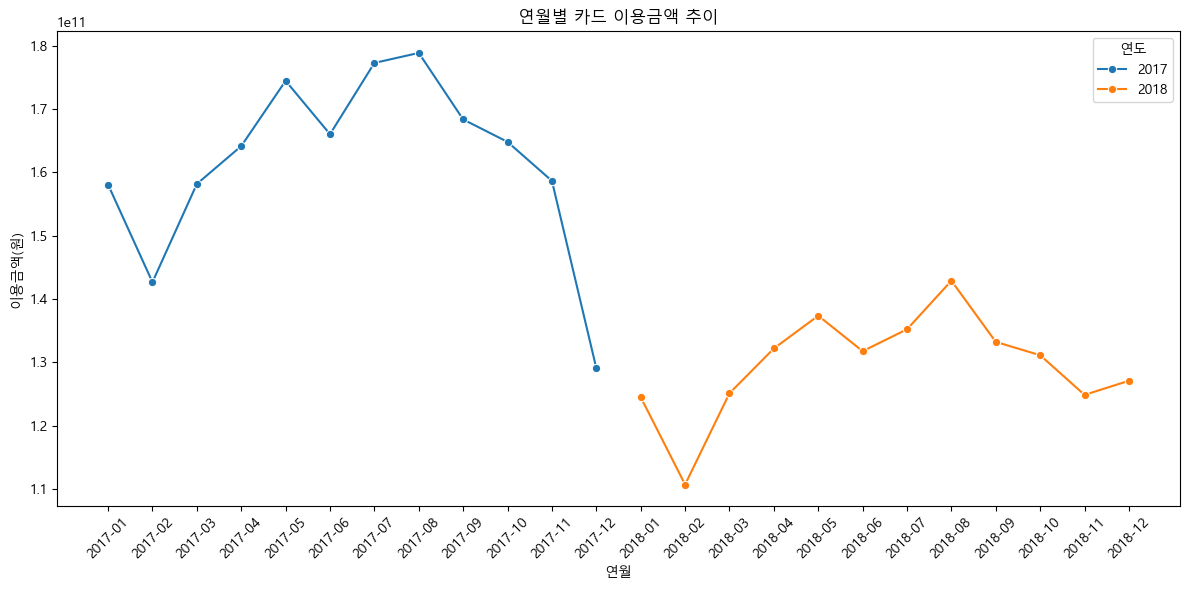

In [21]:
#연월별 카드 이용 추이 비교
monthly = jeju_card_df.groupby(['연월', '연도'])['이용금액'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly, x='연월', y='이용금액', hue='연도', marker='o')
plt.xticks(rotation=45)
plt.title('연월별 카드 이용금액 추이')
plt.ylabel('이용금액(원)')
plt.tight_layout()
plt.show()


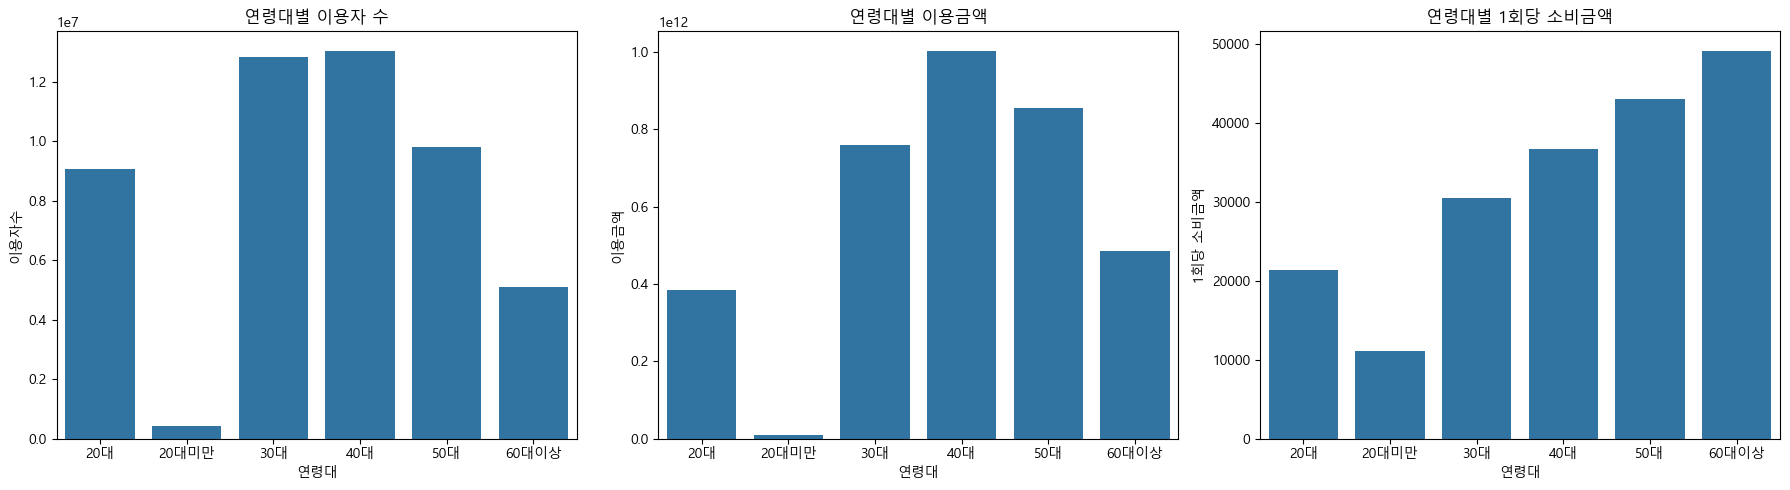

In [22]:
# 연령대별 이용자수, 이용금액, 1회당 소비금액
age_stats = jeju_card_df.groupby('연령대').agg({
    '이용자수': 'sum',
    '이용금액': 'sum',
    '이용횟수': 'sum'
}).reset_index()

age_stats['1회당 소비금액'] = age_stats['이용금액'] / age_stats['이용횟수']

# 시각화
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.barplot(data=age_stats, x='연령대', y='이용자수', ax=axes[0])
axes[0].set_title('연령대별 이용자 수')

sns.barplot(data=age_stats, x='연령대', y='이용금액', ax=axes[1])
axes[1].set_title('연령대별 이용금액')

sns.barplot(data=age_stats, x='연령대', y='1회당 소비금액', ax=axes[2])
axes[2].set_title('연령대별 1회당 소비금액')

plt.tight_layout()
plt.show()


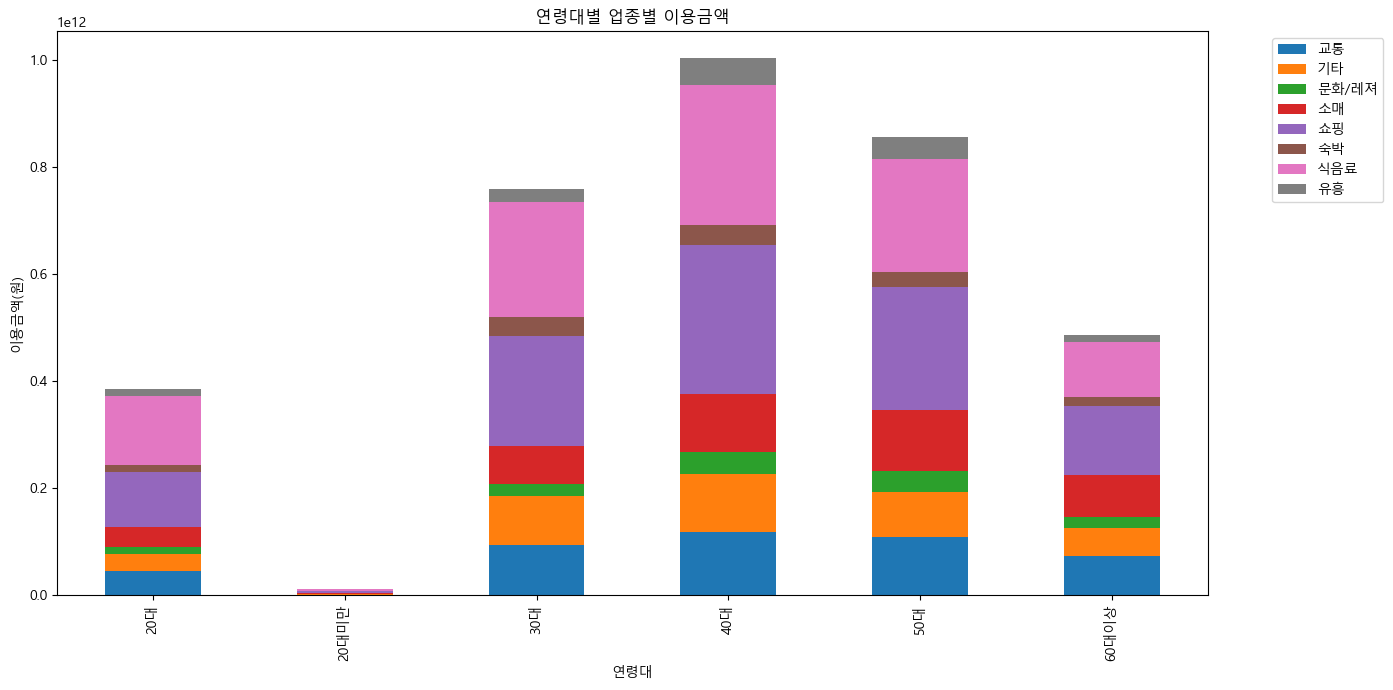

In [23]:
age_sector = jeju_card_df.groupby(['연령대', '업종명'])['이용금액'].sum().reset_index()

# 상위 업종만 표시하기 위해 피벗 후 큰 값만 표시
pivot = age_sector.pivot(index='연령대', columns='업종명', values='이용금액').fillna(0)

pivot.plot(kind='bar', stacked=True, figsize=(14, 7))
plt.title('연령대별 업종별 이용금액')
plt.ylabel('이용금액(원)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


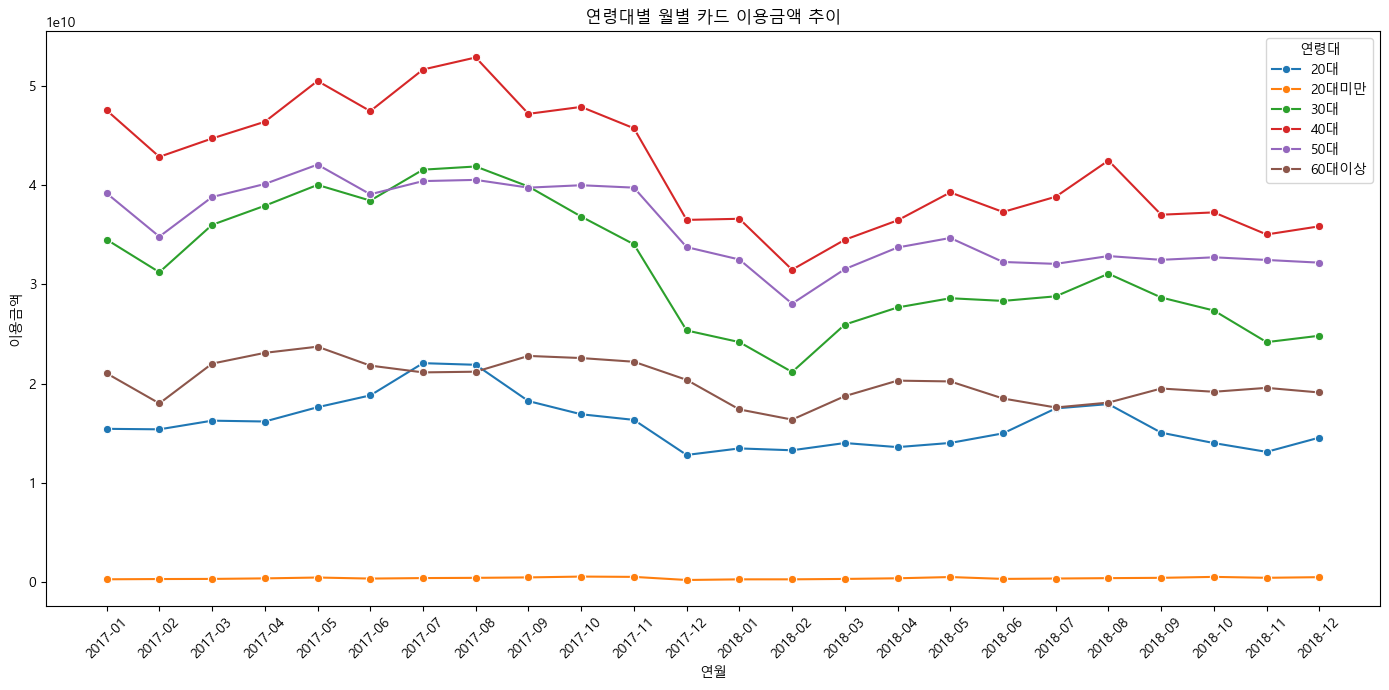

In [25]:
age_monthly = jeju_card_df.groupby(['연월', '연령대'])['이용금액'].sum().reset_index()

plt.figure(figsize=(14, 7))
sns.lineplot(data=age_monthly, x='연월', y='이용금액', hue='연령대', marker='o')
plt.xticks(rotation=45)
plt.title('연령대별 월별 카드 이용금액 추이')
plt.tight_layout()
plt.show()